<a href="https://colab.research.google.com/github/Physsionist/deep_architecture/blob/main/preprocessing_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)

import cv2
import matplotlib.pyplot as plt

import os

In [9]:
base_path = "drive/MyDrive/Colab_Notebooks/deep_learning/final_project/deep_architects/"

### Source Data

https://www.kaggle.com/datasets/dumitrux/architectural-styles-dataset

# Original path setup

In [ ]:
! cp "drive/MyDrive/Colab_Notebooks/deep_learning/final_project/deep_architects/archive_orig.zip" archive_orig.zip

In [ ]:
!unzip -q archive_orig.zip

In [ ]:
lst = []
labels = []
for root, dirs, files in os.walk("archive_orig", topdown=False):
    for name in files:
        lst.append(os.path.join(root, name))
    for name in dirs:
        labels.append(name)

lst[:10]

['archive_orig/architectural-styles-dataset/Bauhaus architecture/003949.jpg',
 'archive_orig/architectural-styles-dataset/Bauhaus architecture/004171.jpg',
 'archive_orig/architectural-styles-dataset/Bauhaus architecture/004076.jpg',
 'archive_orig/architectural-styles-dataset/Bauhaus architecture/003920.jpg',
 'archive_orig/architectural-styles-dataset/Bauhaus architecture/199_800px-Bauhaus_Tel_Aviv-03.jpg',
 'archive_orig/architectural-styles-dataset/Bauhaus architecture/003869.jpg',
 'archive_orig/architectural-styles-dataset/Bauhaus architecture/004313.jpg',
 'archive_orig/architectural-styles-dataset/Bauhaus architecture/004271.jpg',
 'archive_orig/architectural-styles-dataset/Bauhaus architecture/004270.jpg',
 'archive_orig/architectural-styles-dataset/Bauhaus architecture/003911.jpg']

In [ ]:
df_1 = pd.DataFrame(labels[:-1], columns=['class_label']) # -1 is to skip the 'architectural-styles-dataset' folder
df_1['class_index'] = df_1.reset_index().index
df_1.head(5)

,class_label,class_index
0,Bauhaus architecture,0
1,Queen Anne architecture,1
2,Chicago school architecture,2
3,Art Nouveau architecture,3
4,International style,4


In [ ]:
df_paths = pd.DataFrame(lst, columns=['filepath'])
df_paths['class_label'] = df_paths['filepath'].str.extract("(" + "|".join(df_1.class_label) + ')', expand=False)

df_paths = df_paths.dropna(subset=['class_label'])

df_paths = df_paths.sort_values('class_label')
df_paths = df_paths.reset_index(drop=True)

print(df_paths.shape)
df_paths.head()

(10113, 2)


,filepath,class_label
0,archive_orig/architectural-styles-dataset/Achaemenid architecture/000038.jpg,Achaemenid architecture
1,archive_orig/architectural-styles-dataset/Achaemenid architecture/000186.jpg,Achaemenid architecture
2,archive_orig/architectural-styles-dataset/Achaemenid architecture/280_800px-CyrustheGreatTomb_22...,Achaemenid architecture
3,archive_orig/architectural-styles-dataset/Achaemenid architecture/000374.jpg,Achaemenid architecture
4,archive_orig/architectural-styles-dataset/Achaemenid architecture/000064.jpg,Achaemenid architecture


In [ ]:
df_join = df_1.merge(df_paths, on='class_label', how='inner')
df_join = df_join[['class_index', 'class_label', 'filepath']]

print(df_join.shape)
df_join.head()

(10113, 3)


,class_index,class_label,filepath
0,0,Bauhaus architecture,archive_orig/architectural-styles-dataset/Bauhaus architecture/003949.jpg
1,0,Bauhaus architecture,archive_orig/architectural-styles-dataset/Bauhaus architecture/1157_800px-Ev_Dirksen_PO_Highsmit...
2,0,Bauhaus architecture,archive_orig/architectural-styles-dataset/Bauhaus architecture/004041.jpg
3,0,Bauhaus architecture,archive_orig/architectural-styles-dataset/Bauhaus architecture/003905.jpg
4,0,Bauhaus architecture,archive_orig/architectural-styles-dataset/Bauhaus architecture/881_800px-Crown_Hall_060514.jpg


In [ ]:
height = []
width = []

for path in df_join['filepath']:
    img = cv2.imread(path)
    height.append(img.shape[0])
    width.append(img.shape[1])

In [ ]:
df_join['height'] = height
df_join['width'] = width

In [ ]:
df_join.head(2)

,class_index,class_label,filepath,height,width
0,0,Bauhaus architecture,archive_orig/architectural-styles-dataset/Bauhaus architecture/003949.jpg,681,968
1,0,Bauhaus architecture,archive_orig/architectural-styles-dataset/Bauhaus architecture/1157_800px-Ev_Dirksen_PO_Highsmit...,534,800


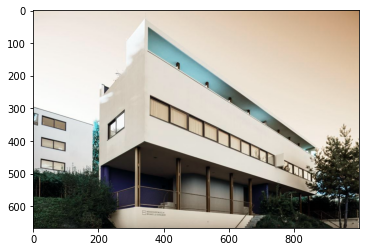

In [ ]:
image_path = df_join['filepath'].iloc[100]
img = cv2.imread(image_path)
plt.imshow(img);

In [ ]:
df_join['filepath'] = df_join['filepath'].str[:7] + df_join['filepath'].str[12:]
df_join.head(2)

,class_index,class_label,filepath,height,width
0,0,Bauhaus architecture,archive/architectural-styles-dataset/Bauhaus architecture/003949.jpg,681,968
1,0,Bauhaus architecture,archive/architectural-styles-dataset/Bauhaus architecture/1157_800px-Ev_Dirksen_PO_Highsmith.jpg,534,800


In [ ]:
# df_join.to_csv(base_path + 'styles_filepath.csv', index=False)

# Start Here to change Augmentation

In [ ]:
! cp "drive/MyDrive/Colab_Notebooks/deep_learning/final_project/deep_architects/archive_orig.zip" archive_orig.zip

In [ ]:
# !rm -r archive_new.zip
# ! rm -r archive

In [ ]:
!unzip -q archive_orig.zip

!mv archive_orig archive
!rm -r archive_orig.zip

In [ ]:
df_join = pd.read_csv(base_path + 'styles_filepath.csv')
df_join.head(2)

,class_index,class_label,filepath,height,width
0,0,Bauhaus architecture,archive/architectural-styles-dataset/Bauhaus architecture/003949.jpg,681,968
1,0,Bauhaus architecture,archive/architectural-styles-dataset/Bauhaus architecture/1157_800px-Ev_Dirksen_PO_Highsmith.jpg,534,800


### Distributions

In [ ]:
df_join.width.value_counts()[:5]

800     2883
1000    1701
450      578
640      269
600      218
Name: width, dtype: int64

In [ ]:
df_join.height.value_counts()[:5]

600     2548
599      587
1000     453
667      291
533      290
Name: height, dtype: int64

### Plot image dimensions - about half have a height of less than 600 pixels

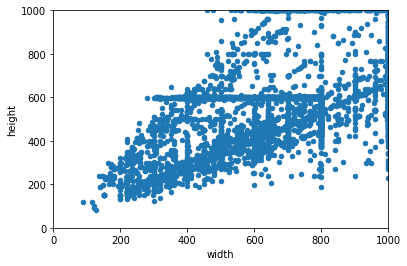

In [ ]:
df_join.plot.scatter(x='width', y='height', xlim=(0,1000), ylim=(0,1000));

In [ ]:
df_join[df_join['height']<600].shape

(5108, 6)

## Before

(600, 800, 3)


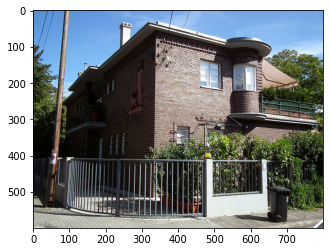

In [ ]:
path = df_join['filepath'].iloc[10]
img = cv2.imread(path)
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

## Proposed Change

(256, 256, 3)


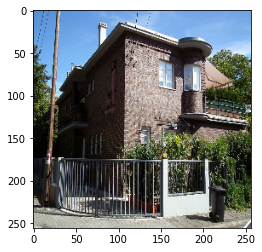

In [ ]:
path = df_join['filepath'].iloc[10]
img = cv2.imread(path)
img = cv2.resize(img, dsize = (256, 256)) 
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [ ]:
for index, row in df_join.iterrows():
    path = row['filepath']
    img = cv2.imread(path)
    img = cv2.resize(img, dsize = (256, 256)) 
    cv2.imwrite(path, img)

## After

(256, 256, 3)


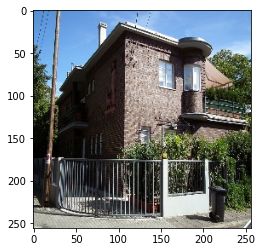

In [ ]:
path = df_join['filepath'].iloc[10]
img = cv2.imread(path)
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

### Save for later

In [ ]:
!zip -r -q archive_new.zip archive
!rm -r archive

In [ ]:
! cp archive_new.zip "drive/MyDrive/Colab_Notebooks/deep_learning/final_project/deep_architects/archive_new_6.27_256x256.zip" 

In [ ]:
!rm -r archive_new.zip